<a href="https://colab.research.google.com/github/macfeel/Blogger/blob/main/2_2_%E2%97%8Fmaze_random_custom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 「つくりながら学ぶ 深層強化学習」　2.2 迷路内をランダムに探索させる

In [1]:
# 使用するパッケージの宣言
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

'''
動画を作成する際に、アニメーションサイズが制限の20971520.0を超えて
より大きなアニメーションを埋め込むことが確実な場合は、
animation.embed_limit rcパラメーターをより大きな値(MB単位)に設定します。
'''
plt.rcParams['animation.embed_limit'] = 2**32

## 1.迷路を自動作成
【参照】  
[子供のために迷路を自動生成する](https://qiita.com/CLA180/items/adc318dcca6dfac60b23)

In [2]:
def direction():
  '''
  進行方向を選択。
  戻り値は順に「現在地の破壊壁方向」「進行部屋の壁破壊方向」「進行部屋の部屋番号」
  '''
  rand = np.random.randint(0, high=4)
  if rand == 0: return 0, 2, -1 * MAZE_SIZE  # 上
  if rand == 1: return 1, -1, 1  # 右
  if rand == 2: return 2, 0, MAZE_SIZE  # 下
  return -1, 1, -1  # 左

In [3]:
def check_cell(cells, c_cell, d_cell, dire):
  ''' 進めるかチェック '''
  # 進んだ部屋が迷路外かどうか
  # 上下へのはみ出し
  if d_cell < 0 or MAZE_CELL <= d_cell: return False
  # 部屋番号+1が迷路サイズで割り切れる場合、右端の部屋。右には進めない。
  if (c_cell+1) % MAZE_SIZE == 0 and dire == 1: return False
  # 部屋番号+1が迷路サイズで割り、余り１の場合、左端の部屋。左には進めない。
  if (c_cell+1) % MAZE_SIZE == 1 and dire == -1: return False
  # 現在地部屋番号 = 進んだ部屋番号。同じ部屋の場合は処理しない
  if cells[c_cell] == cells[d_cell]: return False
  # それ以外は進める
  return True

In [4]:
def choice_cell_no(cells, c_cell, d_cell):
  ''' 小さい方の部屋番号を取得 '''
  if cells[c_cell] < cells[d_cell]:
    return cells[c_cell], cells[d_cell]
  return cells[d_cell], cells[c_cell]

In [5]:
def create_maze():
  ''' 迷路を生成 '''
  # 初期状態を生成
  # [上, 右, 下, 左] = 1:壁 / 0:通路
  lst_maze = np.ones([MAZE_CELL, 4])
  # 部屋のナンバリング、最終的に全部0にする。
  lst_cells = np.array([i for i in range(0, MAZE_CELL)])

  while True:
    # すべての部屋が番号0の時は処理終了
    if np.sum(lst_cells) == 0: break

    # 壁を破る元のセルを選択（現在地）
    int_choice_cell = np.random.randint(0, high=MAZE_CELL)
    # 既にスタート地点とつながっている（0）時は処理しない。
    if lst_cells[int_choice_cell] == 0: continue

    # 進行方向を選択
    int_now_wall, int_direction_wall, int_direction = direction()
    # 進んだときのセル
    int_direction_cell = int_choice_cell + int_direction

    # 値のチェック
    if not check_cell(lst_cells, int_choice_cell, int_direction_cell, int_direction):
      continue

    # 部屋番号を確保
    int_min_value, int_max_value = choice_cell_no(lst_cells, int_choice_cell, int_direction_cell)

    # 小さい方の部屋番号に統一する
    lst_cells[lst_cells == int_max_value] = int_min_value

    # 壁も更新する
    lst_maze[int_choice_cell][int_now_wall] = 0
    lst_maze[int_direction_cell][int_direction_wall] = 0

  return lst_maze 

In [6]:
MAZE_SIZE = int(input('maze size->'))  # 迷路の1辺の長さ
MAZE_CELL = MAZE_SIZE * MAZE_SIZE  # 迷路のセル数

maze size->4


In [7]:
# 迷路を生成
MAZE_OUT = create_maze()

print(MAZE_OUT)

[[1. 1. 0. 1.]
 [1. 0. 0. 1.]
 [1. 1. 1. 0.]
 [1. 1. 0. 1.]
 [0. 0. 1. 1.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 1. 0.]
 [1. 0. 1. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 1. 1. 0.]
 [1. 0. 1. 1.]
 [0. 1. 1. 0.]
 [0. 0. 1. 1.]
 [1. 1. 1. 0.]]


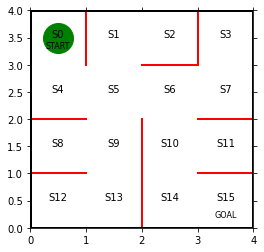

In [8]:
# 初期位置での迷路の様子

# 図を描く大きさと、図の変数名を宣言
fig = plt.figure(figsize=(MAZE_SIZE, MAZE_SIZE))
ax = plt.gca()

# 状態を示す文字S0～S※を描く
# 赤い壁を描く
s_num =0
for gyo in range(MAZE_SIZE):
#for gyo in range(2):
  for retu in range(MAZE_SIZE):
  #for retu in range(1):
   
    plt.text(retu+0.5, MAZE_SIZE-gyo-0.5, 'S'+str(s_num), size=10, ha='center')

    if MAZE_OUT[s_num,0] == 1:
      #print
      #print(gyo,retu,MAZE_OUT[s_num])
      plt.plot([retu, retu+1], [MAZE_SIZE-gyo, MAZE_SIZE-gyo], color='red', linewidth=2)

    if MAZE_OUT[s_num,1] == 1:
      #print
      #print(gyo,retu,MAZE_OUT[s_num])
      plt.plot([retu+1, retu+1], [MAZE_SIZE-gyo-1, MAZE_SIZE-gyo], color='red', linewidth=2)

    if MAZE_OUT[s_num,2] == 1:
      #print
      #print(gyo,retu,MAZE_OUT[s_num])
      plt.plot([retu, retu+1], [MAZE_SIZE-gyo-1, MAZE_SIZE-gyo-1], color='red', linewidth=2)

    if MAZE_OUT[s_num,3] == 1:
      #print
      #print(gyo,retu,MAZE_OUT[s_num])
      plt.plot([retu, retu], [MAZE_SIZE-gyo-1, MAZE_SIZE-gyo], color='red', linewidth=2)

    s_num += 1

plt.plot([0, MAZE_SIZE], [0, 0], color='black', linewidth=3)
plt.plot([MAZE_SIZE, MAZE_SIZE], [0, MAZE_SIZE], color='black', linewidth=3)
plt.plot([0, MAZE_SIZE], [MAZE_SIZE, MAZE_SIZE], color='black', linewidth=3)
plt.plot([0, 0], [MAZE_SIZE, 0], color='black', linewidth=3)

plt.text(0.5, MAZE_SIZE-0.7, 'START', size=8,ha='center')
plt.text(MAZE_SIZE-0.5, 0.2, 'GOAL', size=8,ha='center')

# 描画範囲の設定と目盛りを消す設定
ax.set_xlim(0, MAZE_SIZE)
ax.set_ylim(0, MAZE_SIZE)
plt.tick_params(axis='both', which='both', bottom='off', top='off',labelbottom='off', right='off', left='off', labelleft='off')

# 現在地S0に緑丸を描画する
line, = ax.plot([0.5], [MAZE_SIZE-0.5], marker="o", color='g', markersize=30)

ーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーー

In [9]:
MAZE_OUT = np.delete(MAZE_OUT, (MAZE_SIZE*MAZE_SIZE-1), axis=0)

In [10]:
# # 初期の方策を決定するパラメータtheta_0を設定

# # 行は状態0～7、列は移動方向で↑、→、↓、←を表す
theta_0 = np.where(MAZE_OUT==1,np.nan,1)

In [11]:
theta_0

array([[nan, nan,  1., nan],
       [nan,  1.,  1., nan],
       [nan, nan, nan,  1.],
       [nan, nan,  1., nan],
       [ 1.,  1., nan, nan],
       [ 1.,  1.,  1.,  1.],
       [nan,  1.,  1.,  1.],
       [ 1., nan, nan,  1.],
       [nan,  1., nan, nan],
       [ 1., nan,  1.,  1.],
       [ 1.,  1.,  1., nan],
       [nan, nan, nan,  1.],
       [nan,  1., nan, nan],
       [ 1., nan, nan,  1.],
       [ 1.,  1., nan, nan]])

In [12]:
# 方策パラメータthetaを行動方策piに変換する関数の定義


def simple_convert_into_pi_from_theta(theta):
    '''単純に割合を計算する'''

    [m, n] = theta.shape  # thetaの行列サイズを取得
    pi = np.zeros((m, n))
    for i in range(0, m):
        pi[i, :] = theta[i, :] / np.nansum(theta[i, :])  # 割合の計算

    pi = np.nan_to_num(pi)  # nanを0に変換

    return pi


In [13]:
# 初期の方策pi_0を求める
pi_0 = simple_convert_into_pi_from_theta(theta_0)


In [14]:
# 初期の方策pi_0を表示
pi_0

array([[0.        , 0.        , 1.        , 0.        ],
       [0.        , 0.5       , 0.5       , 0.        ],
       [0.        , 0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        , 0.        ],
       [0.5       , 0.5       , 0.        , 0.        ],
       [0.25      , 0.25      , 0.25      , 0.25      ],
       [0.        , 0.33333333, 0.33333333, 0.33333333],
       [0.5       , 0.        , 0.        , 0.5       ],
       [0.        , 1.        , 0.        , 0.        ],
       [0.33333333, 0.        , 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333, 0.        ],
       [0.        , 0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        , 0.        ],
       [0.5       , 0.        , 0.        , 0.5       ],
       [0.5       , 0.5       , 0.        , 0.        ]])

In [15]:
# 1step移動後の状態sを求める関数を定義


def get_next_s(pi, s):
    direction = ["up", "right", "down", "left"]

    next_direction = np.random.choice(direction, p=pi[s, :])
    # pi[s,:]の確率に従って、directionが選択される

    if next_direction == "up":
        s_next = s - MAZE_SIZE  # 上に移動するときは状態の数字がMAZE_SIZE分小さくなる
    elif next_direction == "right":
        s_next = s + 1  # 右に移動するときは状態の数字が1大きくなる
    elif next_direction == "down":
        s_next = s + MAZE_SIZE  # 下に移動するときは状態の数字がMAZE_SIZE分大きくなる
    elif next_direction == "left":
        s_next = s - 1  # 左に移動するときは状態の数字が1小さくなる

    return s_next


In [16]:
# 迷路内をエージェントがゴールするまで移動させる関数の定義


def goal_maze(pi):
    s = 0  # スタート地点
    state_history = [0]  # エージェントの移動を記録するリスト

    while (1):  # ゴールするまでループ
        next_s = get_next_s(pi, s)
        state_history.append(next_s)  # 記録リストに次の状態（エージェントの位置）を追加

        if next_s == MAZE_SIZE*MAZE_SIZE-1:  # ゴール地点なら終了
            break
        else:
            s = next_s

    return state_history


In [17]:
%%time

# 迷路内をゴールを目指して、移動
state_history = goal_maze(pi_0)


CPU times: user 679 µs, sys: 116 µs, total: 795 µs
Wall time: 1.26 ms


In [18]:
print(state_history)
print("迷路を解くのにかかったステップ数は" + str(len(state_history) - 1) + "です")


[0, 4, 0, 4, 5, 6, 10, 14, 15]
迷路を解くのにかかったステップ数は8です


In [19]:
%%time

# エージェントの移動の様子を可視化します
# 参考URL http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/
from matplotlib import animation
from IPython.display import HTML


def init():
    '''背景画像の初期化'''
    line.set_data([], [])
    return (line,)


def animate(i):
    '''フレームごとの描画内容'''
    state = state_history[i]  # 現在の場所を描く
    #x = (state % 3) + 0.5  # 状態のx座標は、3で割った余り+0.5
    x = (state % MAZE_SIZE) + 0.5  # 状態のx座標は、3で割った余り+0.5
    #y = 2.5 - int(state / 3)  # y座標は3で割った商を2.5から引く
    y = MAZE_SIZE-0.5 - int(state / MAZE_SIZE)  # y座標は3で割った商を2.5から引く
    line.set_data(x, y)
    return (line,)


#　初期化関数とフレームごとの描画関数を用いて動画を作成する
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(
    state_history), interval=200, repeat=False)

HTML(anim.to_jshtml())


CPU times: user 613 ms, sys: 13.7 ms, total: 626 ms
Wall time: 638 ms


In [20]:
# 動画を保存
anim.save('movie_maze-random.mp4')